In [27]:
import os
os.getcwd()

'/Users/pjk/Wunderkammer/AntheiaWorkshop/notebooks'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('../data/FermentationBiomassProduction.csv')

## Inspect the dataset

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Inoculum size (cell/ml)', 'COD (g/L)',
       'Oil and grease (g/L)', 'TKN', 'Olive oil (%)', 'Glucose (g/L)',
       'Crude glycerol (%)', 'Tween 20 (%)', 'Tween 80 (%)', 'Peptone (g/L)',
       'Ammonium sulfate (g/L)', 'Yeast extract (g/L)', 'Urea (g /L)',
       'Total nitrogen (g/L)', 'Mono- sodium glutam ate (g/l)',
       'Di- potassium hydrogen phosphat e (g/l)', 'Magnesium chloride (g/l)',
       'Iron(III) chloride (g/l)', 'Potassium Di-hydrogen phosphate (g/l)',
       'Calcium chloride (g/l)', 'Sodium chloride (g/l)', 'Temp (C)',
       'Shakin g rate (rpm)', 'pH', 'Time (h)', 'Biomass (g/l)',
       'Reference year'],
      dtype='object')


In [4]:
df = df.drop(['Unnamed: 0', 'Reference year'], axis=1)

In [5]:
print(df.sample(5))

     Inoculum size (cell/ml)  COD (g/L)  Oil and grease (g/L)  TKN  \
204              100000000.0     30.300                  0.99  0.0   
292              250000000.0      0.000                  0.00  0.0   
99               100000000.0     75.384                  0.00  0.0   
67               100000000.0     18.605                  0.00  0.0   
58               100000000.0     37.000                  0.00  0.0   

     Olive oil (%)  Glucose (g/L)  Crude glycerol (%)  Tween 20 (%)  \
204              0              0               0.372             0   
292              0              0               4.600             0   
99               0              0               4.000             0   
67               0              0               0.000             0   
58               0              0               0.000             0   

     Tween 80 (%)  Peptone (g/L)  ...  Magnesium chloride (g/l)  \
204             0              0  ...                       0.0   
292             0 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Inoculum size (cell/ml)                  287 non-null    float64
 1   COD (g/L)                                311 non-null    float64
 2   Oil and grease (g/L)                     311 non-null    float64
 3   TKN                                      311 non-null    float64
 4   Olive oil (%)                            311 non-null    int64  
 5   Glucose (g/L)                            311 non-null    int64  
 6   Crude glycerol (%)                       311 non-null    float64
 7   Tween 20 (%)                             311 non-null    int64  
 8   Tween 80 (%)                             311 non-null    int64  
 9   Peptone (g/L)                            311 non-null    int64  
 10  Ammonium sulfate (g/L)                   311 non-n

In [7]:
print(df.describe())

       Inoculum size (cell/ml)   COD (g/L)  Oil and grease (g/L)         TKN  \
count             2.870000e+02  311.000000            311.000000  311.000000   
mean              1.077352e+08   70.251768              1.373458    0.026700   
std               4.040996e+07   48.334295              1.977796    0.063129   
min               1.000000e+07    0.000000              0.000000    0.000000   
25%               1.000000e+08   37.210000              0.000000    0.000000   
50%               1.000000e+08   44.000000              0.241000    0.000000   
75%               1.000000e+08  101.000000              3.300000    0.000000   
max               2.500000e+08  225.670000              5.610000    0.182500   

       Olive oil (%)  Glucose (g/L)  Crude glycerol (%)  Tween 20 (%)  \
count     311.000000     311.000000          311.000000    311.000000   
mean        0.144695       1.028939            1.614961      0.061093   
std         0.839525       6.342570            2.197831     

In [8]:
print(df.nunique())

Inoculum size (cell/ml)                      3
COD (g/L)                                   19
Oil and grease (g/L)                        10
TKN                                          3
Olive oil (%)                                2
Glucose (g/L)                                2
Crude glycerol (%)                          32
Tween 20 (%)                                 3
Tween 80 (%)                                 2
Peptone (g/L)                                2
Ammonium sulfate (g/L)                       4
Yeast extract (g/L)                          4
Urea (g /L)                                  2
Total nitrogen (g/L)                         7
Mono- sodium glutam ate (g/l)                2
Di- potassium hydrogen phosphat e (g/l)      2
Magnesium chloride (g/l)                     2
Iron(III) chloride (g/l)                     2
Potassium Di-hydrogen phosphate (g/l)        2
Calcium chloride (g/l)                       2
Sodium chloride (g/l)                        2
Temp (C)     

In [9]:
df['TKN'].unique()

array([0.09125, 0.1825 , 0.     ])

In [10]:
df['Tween 20 (%)'].unique()

array([0, 2, 5])

In [11]:
df['Total nitrogen (g/L)'].unique()

array([0.   , 0.103, 1.2  , 0.6  , 0.36 , 0.12 , 1.223])

## Handling missing data

In [12]:
df.shape

(311, 26)

In [13]:
# Count missing values
print(df.isnull().sum())

Inoculum size (cell/ml)                    24
COD (g/L)                                   0
Oil and grease (g/L)                        0
TKN                                         0
Olive oil (%)                               0
Glucose (g/L)                               0
Crude glycerol (%)                          0
Tween 20 (%)                                0
Tween 80 (%)                                0
Peptone (g/L)                               0
Ammonium sulfate (g/L)                      0
Yeast extract (g/L)                         0
Urea (g /L)                                 0
Total nitrogen (g/L)                        0
Mono- sodium glutam ate (g/l)               0
Di- potassium hydrogen phosphat e (g/l)     0
Magnesium chloride (g/l)                    0
Iron(III) chloride (g/l)                    0
Potassium Di-hydrogen phosphate (g/l)       0
Calcium chloride (g/l)                      0
Sodium chloride (g/l)                       0
Temp (C)                          

In [14]:
# Drop rows with too many missing values
df = df.dropna()

In [15]:
print(df.isnull().sum())

Inoculum size (cell/ml)                    0
COD (g/L)                                  0
Oil and grease (g/L)                       0
TKN                                        0
Olive oil (%)                              0
Glucose (g/L)                              0
Crude glycerol (%)                         0
Tween 20 (%)                               0
Tween 80 (%)                               0
Peptone (g/L)                              0
Ammonium sulfate (g/L)                     0
Yeast extract (g/L)                        0
Urea (g /L)                                0
Total nitrogen (g/L)                       0
Mono- sodium glutam ate (g/l)              0
Di- potassium hydrogen phosphat e (g/l)    0
Magnesium chloride (g/l)                   0
Iron(III) chloride (g/l)                   0
Potassium Di-hydrogen phosphate (g/l)      0
Calcium chloride (g/l)                     0
Sodium chloride (g/l)                      0
Temp (C)                                   0
Shakin g r

In [16]:
df.shape

(277, 26)

## Univariate analysis

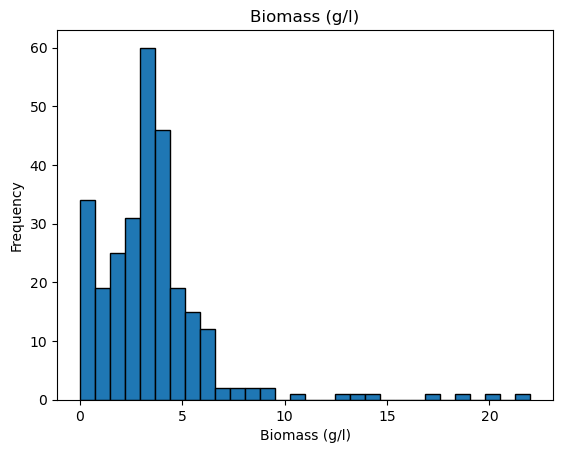

In [17]:
# Histogram for continuous variables
plt.hist(df['Biomass (g/l)'], bins=30, edgecolor="black")
plt.title("Biomass (g/l)")
plt.xlabel("Biomass (g/l)")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Value counts for categorical variables
print(df['Calcium chloride (g/l)'].value_counts())

Calcium chloride (g/l)
0.00    269
0.05      8
Name: count, dtype: int64


## Bivariate analysis

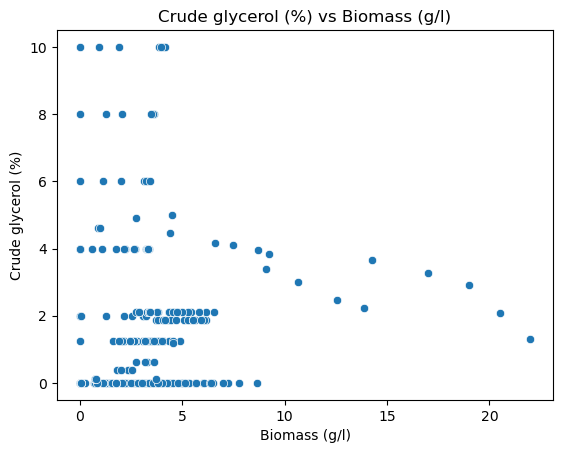

In [19]:
# Scatter plot: Revenue vs Marketing Spend
sns.scatterplot(x = "Biomass (g/l)", y = "Crude glycerol (%)", data = df)
plt.title("Crude glycerol (%) vs Biomass (g/l)")
plt.show()

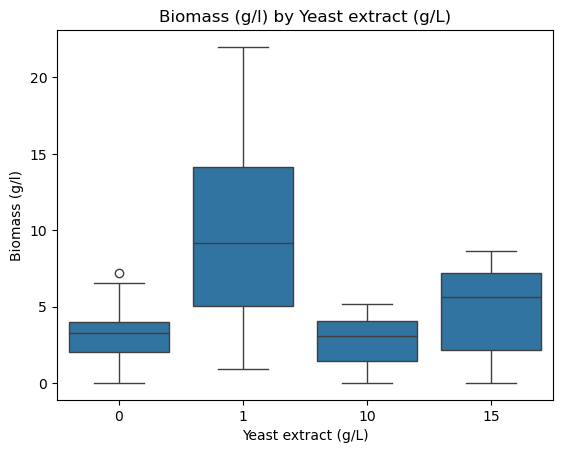

In [21]:
# Box plot: Biomass (g/l) by Yeast extract (g/L)
sns.boxplot(x = "Yeast extract (g/L)", y = "Biomass (g/l)", data = df)
plt.title("Biomass (g/l) by Yeast extract (g/L)")
plt.show()

## Correlation analysis

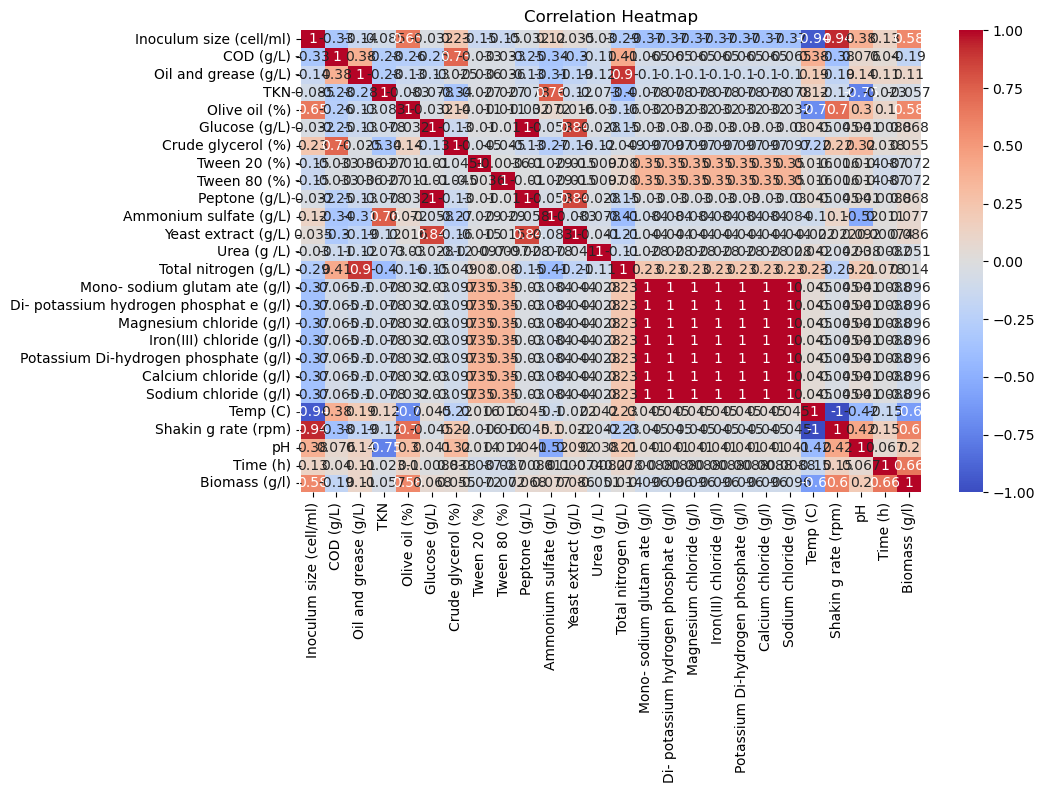

In [22]:
# Correlation matrix
corr = df.corr(numeric_only = True)

# Heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Outlier detection

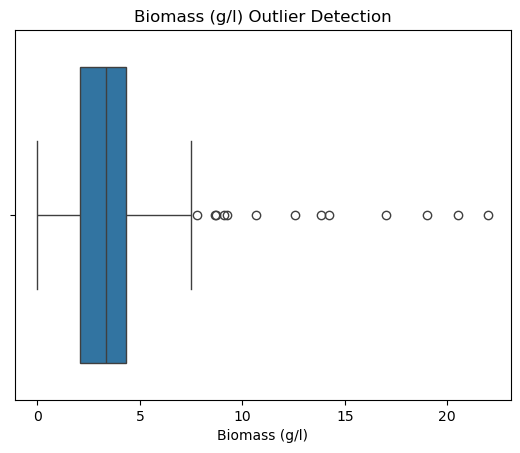

     Inoculum size (cell/ml)  COD (g/L)  Oil and grease (g/L)  TKN  \
52               100000000.0        0.0                   0.0  0.0   
56               100000000.0        0.0                   0.0  0.0   
296              250000000.0        0.0                   0.0  0.0   
297              250000000.0        0.0                   0.0  0.0   
298              250000000.0        0.0                   0.0  0.0   
299              250000000.0        0.0                   0.0  0.0   
300              250000000.0        0.0                   0.0  0.0   
304              250000000.0        0.0                   0.0  0.0   
305              250000000.0        0.0                   0.0  0.0   
306              250000000.0        0.0                   0.0  0.0   
307              250000000.0        0.0                   0.0  0.0   
308              250000000.0        0.0                   0.0  0.0   
309              250000000.0        0.0                   0.0  0.0   

     Olive oil (%) 

In [23]:
# Boxplot for outliers
sns.boxplot(x=df['Biomass (g/l)'])
plt.title("Biomass (g/l) Outlier Detection")
plt.show()

# Using IQR
Q1 = df['Biomass (g/l)'].quantile(0.25)
Q3 = df['Biomass (g/l)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Biomass (g/l)'] < (Q1 - 1.5 * IQR)) | (df['Biomass (g/l)'] > (Q3 + 1.5 * IQR))]
print(outliers)

In [24]:
outliers3 = df[(df['Biomass (g/l)'] < (Q1 - 3.0 * IQR)) | (df['Biomass (g/l)'] > (Q3 + 3.0 * IQR))]
print(outliers3)

     Inoculum size (cell/ml)  COD (g/L)  Oil and grease (g/L)  TKN  \
299              250000000.0        0.0                   0.0  0.0   
300              250000000.0        0.0                   0.0  0.0   
305              250000000.0        0.0                   0.0  0.0   
306              250000000.0        0.0                   0.0  0.0   
307              250000000.0        0.0                   0.0  0.0   
308              250000000.0        0.0                   0.0  0.0   
309              250000000.0        0.0                   0.0  0.0   

     Olive oil (%)  Glucose (g/L)  Crude glycerol (%)  Tween 20 (%)  \
299              0              0                2.23             0   
300              0              0                2.47             0   
305              5              0                3.65             0   
306              5              0                3.26             0   
307              5              0                2.90             0   
308          

## EDA Summary Report

In [26]:
profile = ProfileReport(df, title = "Biomass Data EDA Report")
profile.to_file("biomass_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████| 26/26 [00:00<00:00, 73.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]